## Agnieszka Kamińska - Postgraduate project in Python: 

### " Global warming as a result of climate change - on the example of  Ankara (capital of Turkey). Citiy with significant temperature increase in years:  2000-2020 "

In [1]:
# Uploading libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# File originally uploaded from :
# https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download

# Update the file path based on actual file location
file_path_1 = r"C:\Users\Admin\Downloads\Earth_Surface_Temperature_Data\GlobalLandTemperaturesByCity.csv"
 
# Read the CSV file into a DataFrame
global_temp_by_city = pd.read_csv(file_path_1, encoding='UTF-8') 
 
# displaying data frame
global_temp_by_city

dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
1         Århus      Denmark   57.05N    10.33E  
2         Århus      Denmark   57.05N    10.33E  
3         Århus      Denmark   57.05N    10.33E  
4         Århus      Denmark   57.05N    10.33E  
...         ...          ...      ...       ...  
8599207  Zwolle  Netherlands   52.24N     5.26E  
8599208  Zwolle  Netherlands   52.24N     5.26E  
8599209  Zwolle  Netherlands   52.24N     5.26E  
8599210  Zwolle  Netherlands   52.24N     5.26E  
8599211  Zwolle  Netherlands   52.24N     5.26E  

[8599212 rows x 7 columns]

In [3]:
# File originally uploaded from :
# https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download

# Loading file with countries temperature for to plot global temperature
file_path_2 = r"C:\Users\Admin\Downloads\Earth_Surface_Temperature_Data\GlobalLandTemperaturesByCountry.csv"
 
# Read the CSV file into a DataFrame
global_temp_by_country = pd.read_csv(file_path_2, encoding='UTF-8')  
global_temp_by_country

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe  

[577462 rows x 4 columns]

In [4]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_by_country_clear = global_temp_by_country[~global_temp_by_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

In [5]:
global_temp_by_country_clear = global_temp_by_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [6]:
import numpy as np
import pandas as pd

# Filtering global data to range: 1755-01-01 to 1950-01-01

# Convert the 'dt' column to datetime type if it's not already in datetime format
global_temp_by_country_clear['dt'] = pd.to_datetime(global_temp_by_country_clear['dt'])

# Filter data for the specified date range
filtered_data = global_temp_by_country_clear[(global_temp_by_country_clear['dt'] >= '1755-01-01') & 
                                             (global_temp_by_country_clear['dt'] < '1950-01-01')]

# Get unique countries
countries = np.unique(filtered_data['Country'])

mean_temp_1 = []

# Calculate mean temperature for each country
for country in countries:
    mean_temp_1.append(filtered_data[filtered_data['Country'] == country]['AverageTemperature'].mean())

In [7]:
data_1 = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp_1,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

In [8]:
layout = dict(
    title = 'Average land temperature in countries in years 1755-1950',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

In [9]:
fig = dict(data=data_1, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [10]:
import numpy as np
import pandas as pd

# Filtering global data to range: 1950-01-01 to 2000-01-01

# Convert the 'dt' column to datetime type if it's not already in datetime format
global_temp_by_country_clear['dt'] = pd.to_datetime(global_temp_by_country_clear['dt'])

# Filter data for the specified date range
filtered_data = global_temp_by_country_clear[(global_temp_by_country_clear['dt'] >= '1950-01-01') & 
                                             (global_temp_by_country_clear['dt'] <  '2000-01-01')]

# Get unique countries
countries = np.unique(filtered_data['Country'])

mean_temp_2 = []

# Calculate mean temperature for each country
for country in countries:
    mean_temp_2.append(filtered_data[filtered_data['Country'] == country]['AverageTemperature'].mean())

In [11]:
data_2 = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp_2,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

In [12]:
layout = dict(
    title = 'Average land temperature in countries in years 1950-2000',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

In [13]:
fig = dict(data=data_2, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [14]:
import numpy as np
import pandas as pd

# Filtering global data to range: 2000-01-01 to 2013-09-01

# Convert the 'dt' column to datetime type if it's not already in datetime format
global_temp_by_country_clear['dt'] = pd.to_datetime(global_temp_by_country_clear['dt'])

# Filter data for the specified date range
filtered_data = global_temp_by_country_clear[(global_temp_by_country_clear['dt'] >= '2000-01-01') & 
                                             (global_temp_by_country_clear['dt'] <  '2013-09-01')]

# Get unique countries
countries = np.unique(filtered_data['Country'])

mean_temp_3 = []

# Calculate mean temperature for each country
for country in countries:
    mean_temp_3.append(filtered_data[filtered_data['Country'] == country]['AverageTemperature'].mean())

In [15]:
data_3 = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp_3,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

In [16]:
layout = dict(
    title = 'Average land temperature in countries in years 2000-2013',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

In [17]:
fig = dict(data=data_3, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [18]:
import pandas as pd

global_temp_by_city['dt'] = pd.to_datetime(global_temp_by_city['dt'])

# Creation of a new column for the year
global_temp_by_city['Year'] = global_temp_by_city['dt'].dt.year

# Creation of a new column for the previous year
global_temp_by_city['Prev_Year'] = global_temp_by_city['Year'] - 1

# Creation of a new column for the month
global_temp_by_city['Month'] = global_temp_by_city['dt'].dt.month

# Merge the DataFrame with itself to get data for the previous year
merged_df = pd.merge(global_temp_by_city, global_temp_by_city, left_on=['City', 'Country', 'Month', 'Prev_Year'], right_on=['City', 'Country', 'Month', 'Year'], suffixes=('_current', '_prev'))

# Calculate the delta temperature incrementally
merged_df['Delta_Temperature'] = merged_df['AverageTemperature_current'] - merged_df['AverageTemperature_prev']

# Filter data for the last 13 years
# Filter data for the specified period using boolean indexing
start_date = pd.to_datetime('2000-09-01')
end_date = pd.to_datetime('2013-09-01')
filtered_data = merged_df[(merged_df['dt_current'] >= start_date) & (merged_df['dt_current'] <= end_date)]

# Group by city and country, and calculate the average delta temperature for each city and country
result_df = filtered_data.groupby(['Country', 'City'])['Delta_Temperature'].mean().reset_index()

# Display the result
print(result_df)

          Country       City  Delta_Temperature
0     Afghanistan     Baglan          -0.055250
1     Afghanistan     Gardez          -0.088205
2     Afghanistan      Gazni          -0.083776
3     Afghanistan      Herat          -0.018917
4     Afghanistan  Jalalabad          -0.075571
...           ...        ...                ...
3485     Zimbabwe      Gweru           0.059282
3486     Zimbabwe     Harare           0.047019
3487     Zimbabwe     Kadoma           0.047019
3488     Zimbabwe     Kwekwe           0.047019
3489     Zimbabwe     Mutare           0.033090

[3490 rows x 3 columns]


In [19]:
# Top 10 cities with highest temperature increase in years: 2000-2013
sorted_df = result_df.sort_values(by='Delta_Temperature', ascending=False)

# Display the top 10 cities with the highest increment in delta temperature
top_10_cities = sorted_df.head(10)
print(top_10_cities)

       Country            City  Delta_Temperature
2997    Turkey          Ankara           0.150878
3043    Turkey           Çorum           0.142962
3041    Turkey       Zonguldak           0.139058
2985  Thailand      Udon Thani           0.136756
2970  Thailand       Khon Kaen           0.136756
2977  Thailand     Phitsanulok           0.134173
3018    Turkey         Kayseri           0.132058
2994    Turkey  Afyonkarahisar           0.131917
3007    Turkey       Eskisehir           0.131917
3033    Turkey           Tokat           0.130282


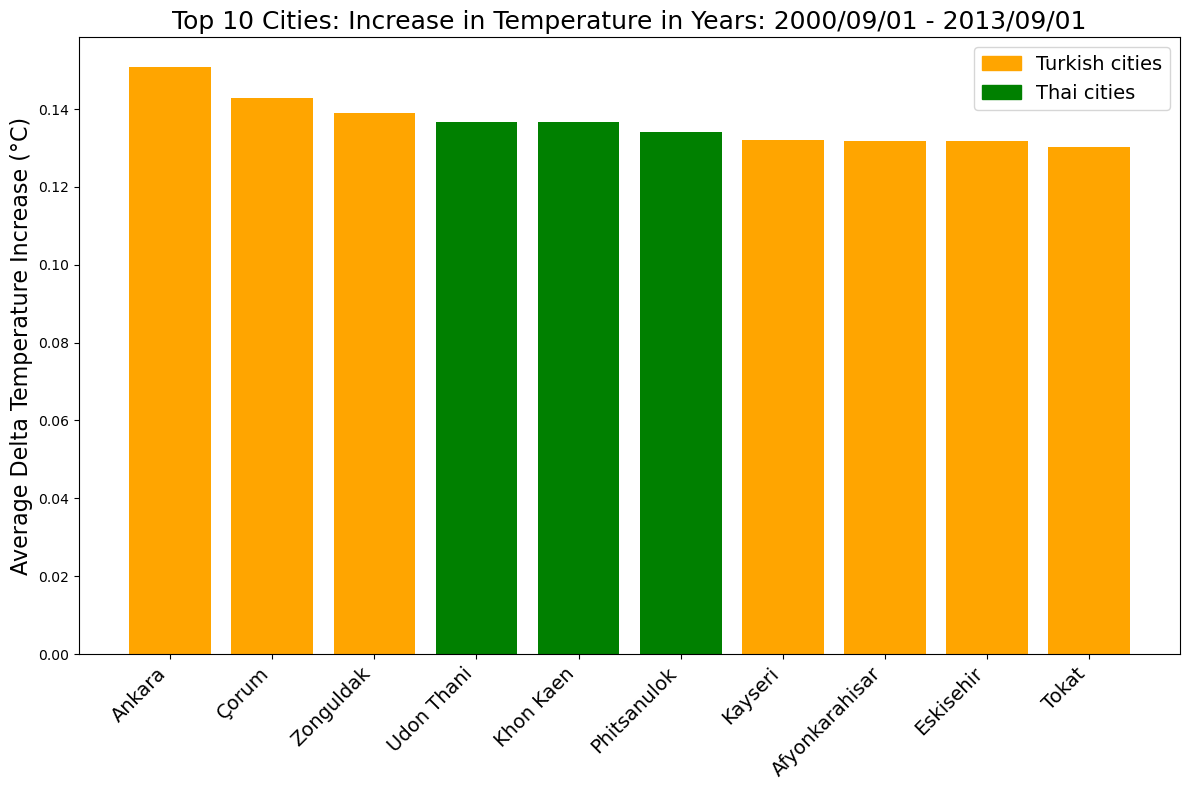

In [20]:
# Column chart 

# Assuming you have already defined top_10_cities and their colors
top_10_cities['Color'] = ['orange', 'orange', 'orange', 'green', 'green', 'green', 'orange', 'orange', 'orange', 'orange']

plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_cities['City'], top_10_cities['Delta_Temperature'], color=top_10_cities['Color'])

# Rest of your code remains the same
plt.ylabel('Average Delta Temperature Increase (°C)', fontsize=16)
plt.title('Top 10 Cities: Increase in Temperature in Years: 2000/09/01 - 2013/09/01', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Creating a legend
legend_labels = {'orange': 'Turkish cities', 'green': 'Thai cities'}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in legend_labels.items()]

# Associate legend labels with the bars
plt.legend(handles=legend_handles, loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

In [21]:
# Uploading temperatures for Ankara from 2013-09-01 till 2020-12-31 

# https://data.berkeleyearth.org/auto/Local/TAVG/Text/39.38N-33.29E-TAVG-Trend.txt

# Average temperature = Monthly Anomaly + Estimated Jan 1951-Dec 1980 monthly absolute temperature (C) for months:
# Jan,    Feb,    Mar,    Apr,    May,    Jun,    Jul,    Aug,    Sep,    Oct,    Nov,    Dec.

# Update the file path based on your actual file location
file_path_3 = r"C:\Users\Admin\Downloads\Earth_Surface_Temperature_Data\Ankara_2.csv"
 
# Read the CSV file into a DataFrame
global_temp_by_Ankara = pd.read_csv(file_path_3, encoding='UTF-8')#, parse_dates=['dt']).set_index('dt')
 

global_temp_by_Ankara['dt'] = pd.to_datetime(global_temp_by_Ankara['dt'])

# Creation of a new column for the year
global_temp_by_Ankara['Year'] = global_temp_by_Ankara['dt'].dt.year

# Creation of a new column for the previous year
global_temp_by_Ankara['Prev_Year'] = global_temp_by_Ankara['Year'] - 1

# Creation of a new column for the month
global_temp_by_Ankara['Month'] = global_temp_by_Ankara['dt'].dt.month


global_temp_by_Ankara

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0  2013-09-01              17.588                          0.237  Ankara   
1  2013-10-01              10.849                          0.216  Ankara   
2  2013-11-01               8.188                          0.213  Ankara   
3  2013-12-01              -1.712                          0.280  Ankara   
4  2014-01-01               2.810                          0.234  Ankara   
..        ...                 ...                            ...     ...   
83 2020-08-01              24.187                          0.312  Ankara   
84 2020-09-01              22.700                          0.335  Ankara   
85 2020-10-01              17.355                          0.594  Ankara   
86 2020-11-01               6.783                          0.461  Ankara   
87 2020-12-01               5.410                          0.371  Ankara   

   Country Latitude Longitude  Year  Prev_Year  Month  
0   Turkey   39.38N    33.29E  2013       2012      9  
1   Turkey   39.38N    33.29E  2013       2012     10  
2   Turkey   39.38N    33.29E  2013       2012     11  
3   Turkey   39.38N    33.29E  2013       2012     12  
4   Turkey   39.38N    33.29E  2014       2013      1  
..     ...      ...       ...   ...        ...    ...  
83  Turkey   39.38N    33.29E  2020       2019      8  
84  Turkey   39.38N    33.29E  2020       2019      9  
85  Turkey   39.38N    33.29E  2020       2019     10  
86  Turkey   39.38N    33.29E  2020       2019     11  
87  Turkey   39.38N    33.29E  2020       2019     12  

[88 rows x 10 columns]

In [22]:
# Deleting row with date '9/1/2013', City: 'Ankara', Country: 'Turkey', 'AverageTemperature', 
#'AverageTemperatureUncertainty since is empty'
conditions =(
        (global_temp_by_city['dt'] == '2013-09-01') &
        (global_temp_by_city['AverageTemperature'] =='') &
        (global_temp_by_city['AverageTemperatureUncertainty'] =='') &
        (global_temp_by_city['City'] == 'Ankara') &
        (global_temp_by_city['Country'] == 'Turkey') &
        (global_temp_by_city['Latitude'] == '39.38N') &
        (global_temp_by_city['Longitude'] == '33.29E') 
          )

# Use the conditions to filter and drop the specified row
global_temp_by_city = global_temp_by_city.drop(conditions, axis=0, errors='ignore')

# Reset the index if needed
global_temp_by_city.reset_index(drop=True, inplace=True)

new_global_temp_by_city = global_temp_by_city.drop(global_temp_by_city[conditions].index).reset_index(drop=True)
new_global_temp_by_city

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0       1743-11-01               6.068                          1.737   Århus   
1       1743-12-01                 NaN                            NaN   Århus   
2       1744-01-01                 NaN                            NaN   Århus   
3       1744-02-01                 NaN                            NaN   Århus   
4       1744-03-01                 NaN                            NaN   Århus   
...            ...                 ...                            ...     ...   
8599207 2013-05-01              11.464                          0.236  Zwolle   
8599208 2013-06-01              15.043                          0.261  Zwolle   
8599209 2013-07-01              18.775                          0.193  Zwolle   
8599210 2013-08-01              18.025                          0.298  Zwolle   
8599211 2013-09-01                 NaN                            NaN  Zwolle   

             Country Latitude Longitude  Year  Prev_Year  Month  
0            Denmark   57.05N    10.33E  1743       1742     11  
1            Denmark   57.05N    10.33E  1743       1742     12  
2            Denmark   57.05N    10.33E  1744       1743      1  
3            Denmark   57.05N    10.33E  1744       1743      2  
4            Denmark   57.05N    10.33E  1744       1743      3  
...              ...      ...       ...   ...        ...    ...  
8599207  Netherlands   52.24N     5.26E  2013       2012      5  
8599208  Netherlands   52.24N     5.26E  2013       2012      6  
8599209  Netherlands   52.24N     5.26E  2013       2012      7  
8599210  Netherlands   52.24N     5.26E  2013       2012      8  
8599211  Netherlands   52.24N     5.26E  2013       2012      9  

[8599212 rows x 10 columns]

In [23]:
import pandas as pd

# Temperature extension for Ancara till 12/31/2020

# Concatenate them vertically ( by union) 'global_temp_by_city' and 'global_temp_by_Ankara'
global_temp_by_city_extended = pd.concat([new_global_temp_by_city, global_temp_by_Ankara], ignore_index=True)

# The ignore_index=True parameter resets the index after concatenation

# Display the result

global_temp_by_city_extended

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0       1743-11-01               6.068                          1.737   Århus   
1       1743-12-01                 NaN                            NaN   Århus   
2       1744-01-01                 NaN                            NaN   Århus   
3       1744-02-01                 NaN                            NaN   Århus   
4       1744-03-01                 NaN                            NaN   Århus   
...            ...                 ...                            ...     ...   
8599295 2020-08-01              24.187                          0.312  Ankara   
8599296 2020-09-01              22.700                          0.335  Ankara   
8599297 2020-10-01              17.355                          0.594  Ankara   
8599298 2020-11-01               6.783                          0.461  Ankara   
8599299 2020-12-01               5.410                          0.371  Ankara   

         Country Latitude Longitude  Year  Prev_Year  Month  
0        Denmark   57.05N    10.33E  1743       1742     11  
1        Denmark   57.05N    10.33E  1743       1742     12  
2        Denmark   57.05N    10.33E  1744       1743      1  
3        Denmark   57.05N    10.33E  1744       1743      2  
4        Denmark   57.05N    10.33E  1744       1743      3  
...          ...      ...       ...   ...        ...    ...  
8599295   Turkey   39.38N    33.29E  2020       2019      8  
8599296   Turkey   39.38N    33.29E  2020       2019      9  
8599297   Turkey   39.38N    33.29E  2020       2019     10  
8599298   Turkey   39.38N    33.29E  2020       2019     11  
8599299   Turkey   39.38N    33.29E  2020       2019     12  

[8599300 rows x 10 columns]

In [24]:
import pandas as pd

# How changed delta temperature YoY 2000-12-31 - 2020-12-31
merged_df = pd.merge(global_temp_by_city_extended, global_temp_by_city_extended, left_on=['City', 'Country', 'Month', 'Prev_Year'], right_on=['City', 'Country', 'Month', 'Year'], suffixes=('_current', '_prev'))

# Calculate the delta temperature incrementally
merged_df['Delta_Temperature'] = merged_df['AverageTemperature_current'] - merged_df['AverageTemperature_prev']

# Filter data for the last 13 years
# Filter data for the specified period using boolean indexing
start_date = pd.to_datetime('2000-12-31')
end_date = pd.to_datetime('2020-12-31')

# Additional condition for City==Ankara
filtered_data = merged_df[(merged_df['dt_current'] >= start_date) & (merged_df['dt_current'] <= end_date) & (merged_df['City'] == 'Ankara')]

# Group by city and country, and calculate the average delta temperature for each city and country
result_df = filtered_data.groupby(['Country', 'City'])['Delta_Temperature'].mean().reset_index()

# Display the result
print(result_df)

  Country    City  Delta_Temperature
0  Turkey  Ankara           0.147896


In [25]:
# Average land temperature in Ankara in years: 1900 - 2020
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py

# Assuming global_temp_by_city - Average Temperature for Ankara:

# Filter data for Ankara
ankara_temp = global_temp_by_city_extended[global_temp_by_city_extended['City'] == 'Ankara']

# Convert 'dt' column to string
ankara_temp['dt'] = ankara_temp['dt'].astype(str)

# Extract the year from a date
years = np.unique(ankara_temp['dt'].apply(lambda x: x[:4]))
mean_temp_ankara = []
mean_temp_ankara_uncertainty = []

for year in years:
    mean_temp_ankara.append(ankara_temp[ankara_temp['dt'].apply(
        lambda x: x[:4]) == year]['AverageTemperature'].mean())
    mean_temp_ankara_uncertainty.append(ankara_temp[ankara_temp['dt'].apply(
        lambda x: x[:4]) == year]['AverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x=years,
    y=np.array(mean_temp_ankara) + np.array(mean_temp_ankara_uncertainty),
    fill=None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x=years,
    y=np.array(mean_temp_ankara) - np.array(mean_temp_ankara_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x=years,
    y=mean_temp_ankara,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)

layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Average Temperature, °C'),
    title=dict(
        text='Average land temperature in Ankara 1755 -2020',
        x=0.5,  # Set x to 0.5 for center alignment
        xanchor='center',  # Center alignment
        yanchor='top',  # Align to the top of the plot
        font=dict(
            family='Arial',
            size=24,
            color='rgb(37,37,37)'
        )
    ),
    showlegend=False
)

fig = go.Figure(data=[trace0, trace1, trace2], layout=layout)
py.iplot(fig)

In [26]:
# How many na do we have in data frame starting at year 1755 till the end of 2020?
# How many #N/A data we have in ankara_temp
na_cols = (ankara_temp.isna().sum() > 0)
ankara_temp.loc[:, na_cols].isna().sum().sort_values(ascending=False)

AverageTemperature               160
AverageTemperatureUncertainty    160
dtype: int64

In [27]:
# Filter data for Ankara after 1900-01-01

# Assuming global_temp_by_city_extended is your DataFrame
ankara_temp = global_temp_by_city_extended[(global_temp_by_city_extended['City'] == 'Ankara') & (global_temp_by_city_extended['dt'] >= '1900-01-01')]

# Convert 'dt' column to string
ankara_temp['dt'] = ankara_temp['dt'].astype(str)

# Extract the year from a date
years = np.unique(ankara_temp['dt'].apply(lambda x: x[:4]))
mean_temp_ankara = []
mean_temp_ankara_uncertainty = []

for year in years:
    mean_temp_ankara.append(ankara_temp[ankara_temp['dt'].apply(
        lambda x: x[:4]) == year]['AverageTemperature'].mean())
    mean_temp_ankara_uncertainty.append(ankara_temp[ankara_temp['dt'].apply(
        lambda x: x[:4]) == year]['AverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x=years,
    y=np.array(mean_temp_ankara) + np.array(mean_temp_ankara_uncertainty),
    fill=None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x=years,
    y=np.array(mean_temp_ankara) - np.array(mean_temp_ankara_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x=years,
    y=mean_temp_ankara,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Average Temperature, °C'),
    title=dict(
        text='Average land temperature in Ankara: 1900/01/01 - 2020/12/31',
        x=0.5,  # Set x to 0.5 for center alignment
        xanchor='center',  # Center alignment
        yanchor='top',  # Align to the top of the plot
        font=dict(
            family='Arial',
            size=24,
            color='rgb(37,37,37)'
        )
    ),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [29]:
# How many na do we have in data frame after 1/1/1900?
# How many #N/A data we have in ankara_temp
na_cols = (ankara_temp.isna().sum() > 0)
ankara_temp.loc[:, na_cols].isna().sum().sort_values(ascending=False)

AverageTemperature               1
AverageTemperatureUncertainty    1
dtype: int64

In [30]:
# ANKARA 

In [31]:
# Filtering file only for Ankara

import pandas as pd

# Reading and transforming the file

# Assuming you have already imported your DataFrame as global_temp_by_city_extended

ankara = global_temp_by_city_extended.loc[global_temp_by_city_extended['City'] == 'Ankara', ['dt','AverageTemperature']]
ankara.columns = ['Date','Temp']
ankara['Date'] = pd.to_datetime(ankara['Date'])
ankara = ankara.groupby('Date').mean()  # Ensure unique index by grouping on 'Date'
ankara = ankara.asfreq('M', method='bfill')
ankara = ankara.loc['1900':'2020-12-31']

ankara.head()

Temp
Date              
1900-01-31   3.339
1900-02-28   4.060
1900-03-31   9.777
1900-04-30  14.301
1900-05-31  17.860

In [32]:
ankara

Temp
Date              
1900-01-31   3.339
1900-02-28   4.060
1900-03-31   9.777
1900-04-30  14.301
1900-05-31  17.860
...            ...
2020-07-31  24.187
2020-08-31  22.700
2020-09-30  17.355
2020-10-31   6.783
2020-11-30   5.410

[1451 rows x 1 columns]

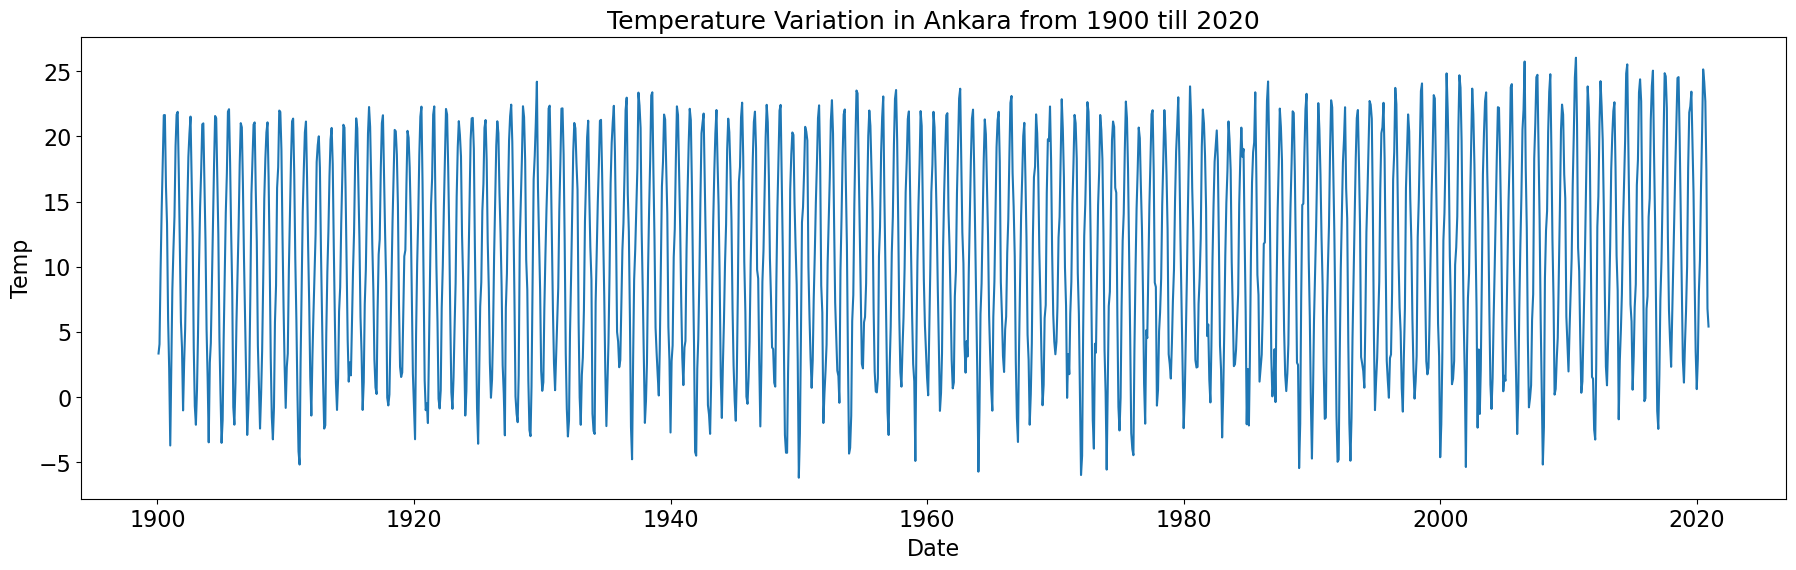

In [34]:
plt.figure(figsize=(22,6))
sns.lineplot(x=ankara.index, y=ankara['Temp'])
plt.title('Temperature Variation in Ankara from 1900 till 2020', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temp', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

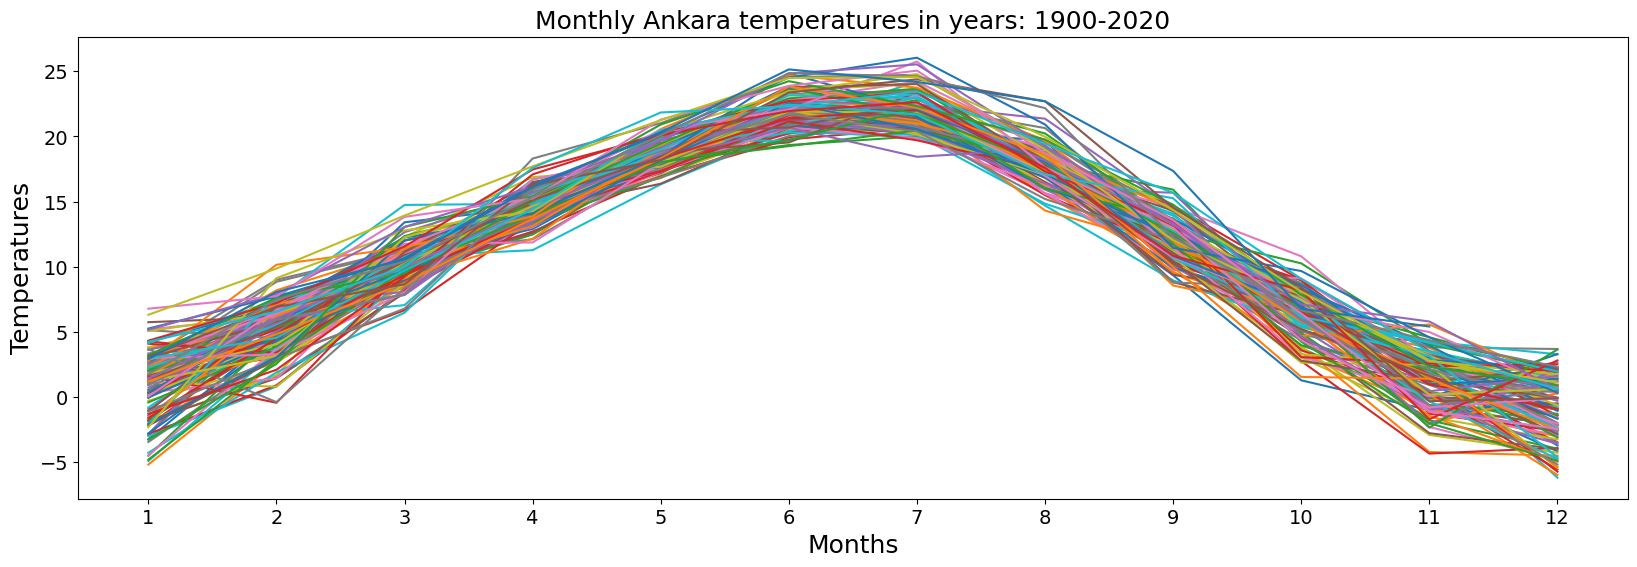

In [35]:
# Creation of a pivot table to plot the monthly temperatures through the years: 1900 - 2020
ankara['month'] = ankara.index.month
ankara['year'] = ankara.index.year
pivot = pd.pivot_table(ankara, values='Temp', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Monthly Ankara temperatures in years: 1900-2020',fontsize=18)
plt.xlabel('Months', fontsize=18)
plt.ylabel('Temperatures', fontsize=18)
plt.xticks([x for x in range(1,13)], fontsize=14)
plt.yticks(fontsize=14)
plt.legend().remove()
plt.show()

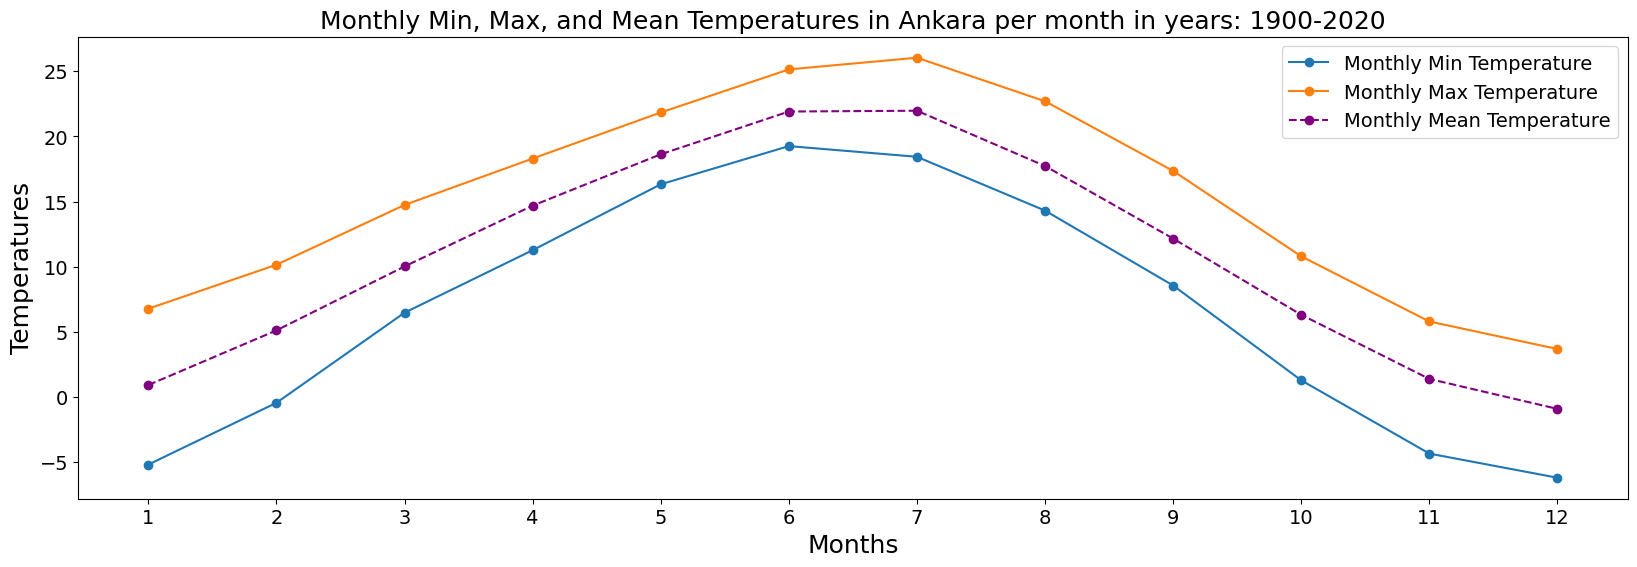

    Month  Year_Min  Year_Max  Min_Temperature  Max_Temperature  \
0       1      1911      2016           -5.185            6.780   
1       2      1953      2001           -0.443           10.153   
2       3      1949      1989            6.473           14.743   
3       4      1919      2007           11.272           18.305   
4       5      1919      2019           16.329           21.841   
5       6      1982      2020           19.260           25.148   
6       7      1984      2010           18.439           26.044   
7       8      1961      2020           14.309           22.700   
8       9      1951      2020            8.559           17.355   
9      10      1920      1966            1.281           10.798   
10     11      1953      2014           -4.343            5.797   
11     12      1949      1947           -6.195            3.686   

    Temp_Diff(Max-Min)  Mean_Temperature  
0               11.965          0.921769  
1               10.596          5.114636  

In [36]:
# Min, Max and Mean Temperature through months in years: 1900 - 2020 


import pandas as pd
import matplotlib.pyplot as plt

# ankara
ankara['month'] = ankara.index.month
ankara['year'] = ankara.index.year

# Calculate min, max, and mean temperature per month
monthly_min = ankara.groupby(['month'])['Temp'].agg(['min', 'idxmin'])
monthly_max = ankara.groupby(['month'])['Temp'].agg(['max', 'idxmax'])
monthly_mean = ankara.groupby(['month'])['Temp'].agg(['mean'])

# Calculate the difference between max and min temperatures
monthly_diff = monthly_max['max'] - monthly_min['min']

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Month': [x for x in range(1, 13)],
    'Year_Min': monthly_min['idxmin'].apply(lambda x: ankara.loc[x, 'year']).values,
    'Year_Max': monthly_max['idxmax'].apply(lambda x: ankara.loc[x, 'year']).values,
    'Min_Temperature': monthly_min['min'].values,
    'Max_Temperature': monthly_max['max'].values,
    "Temp_Diff(Max-Min)": monthly_diff.values,
    'Mean_Temperature': monthly_mean['mean'].values
})

# Plot the min, max, and mean temperatures
plt.figure(figsize=(20, 6))
plt.plot(monthly_min['min'], label='Monthly Min Temperature', marker='o')
plt.plot(monthly_max['max'], label='Monthly Max Temperature', marker='o')
plt.plot(monthly_mean['mean'], label='Monthly Mean Temperature', marker='o', linestyle='--', color='purple')

plt.title('Monthly Min, Max, and Mean Temperatures in Ankara per month in years: 1900-2020', fontsize=18)
plt.xlabel('Months', fontsize=18)
plt.ylabel('Temperatures', fontsize=18)
plt.xticks([x for x in range(1, 13)], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Display the table
print(result_df)

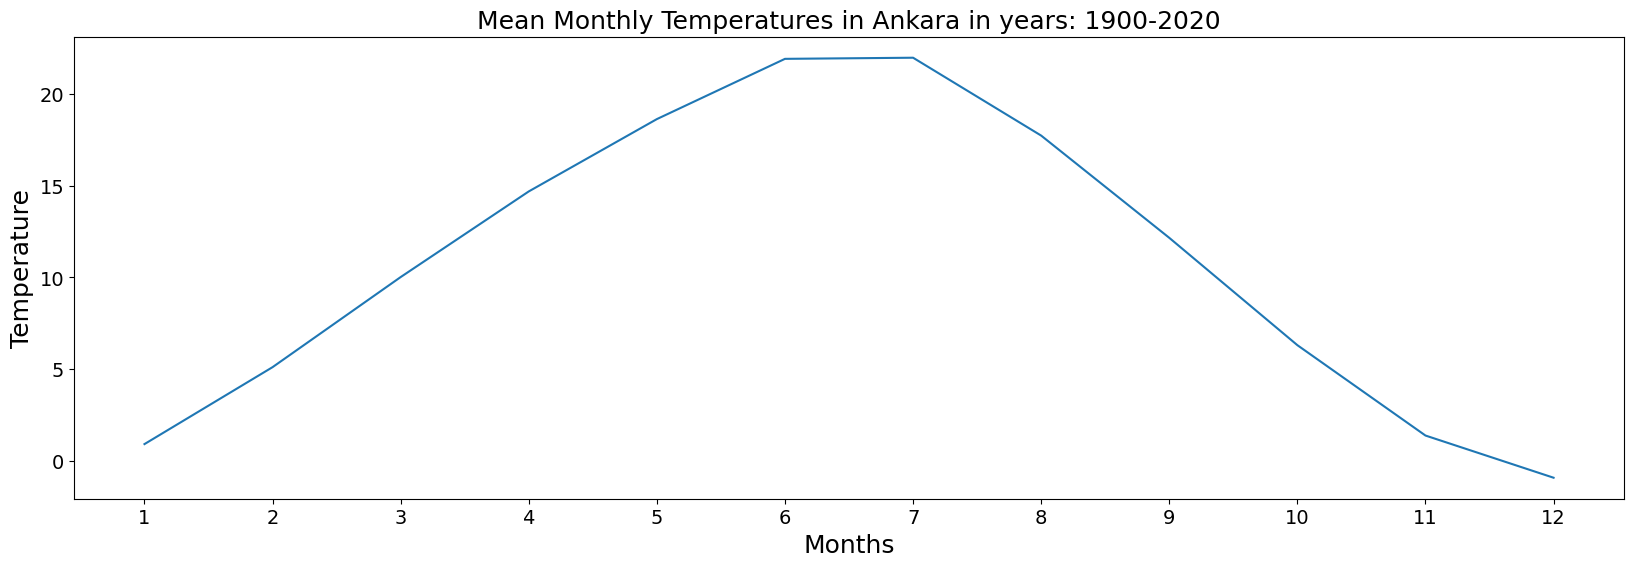

In [38]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Mean Monthly Temperatures in Ankara in years: 1900-2020',fontsize=18)
plt.xlabel('Months',fontsize=18)
plt.ylabel('Temperature',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([x for x in range(1,13)])
plt.show()

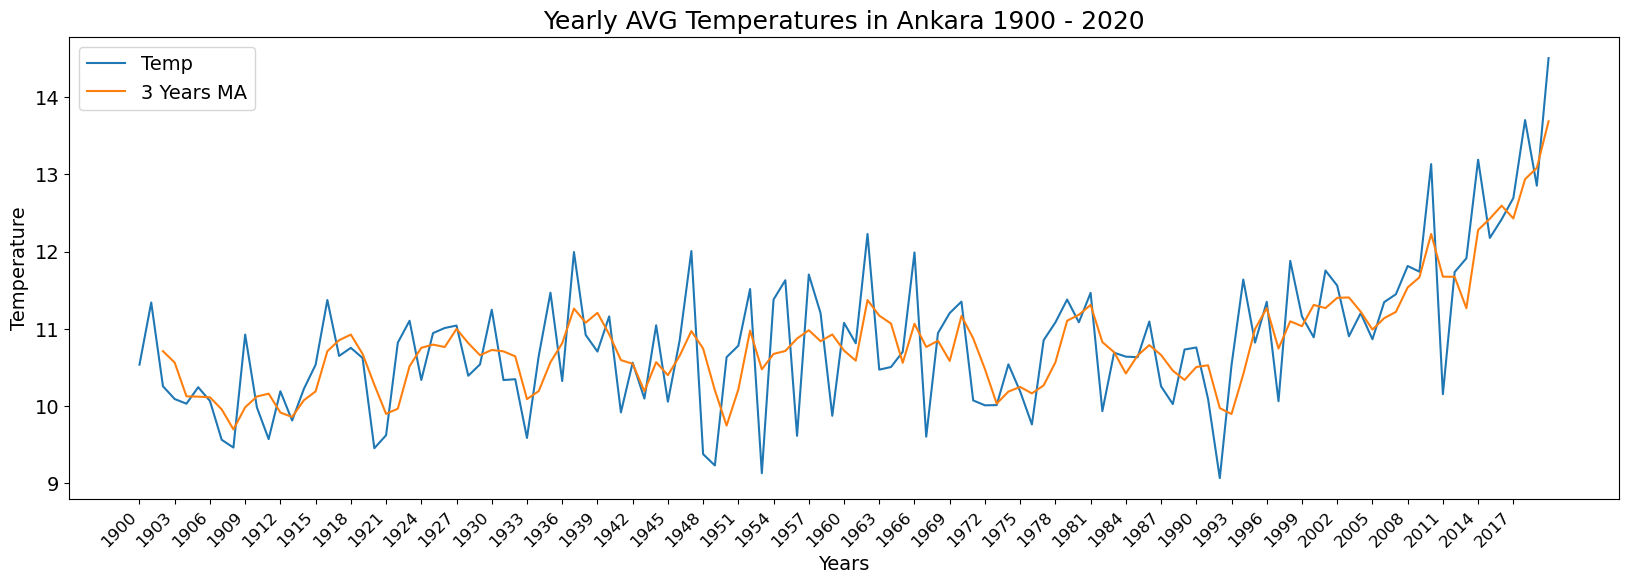

In [39]:
# 'Yearly AVG Temperatures in Ankara 1900 - 2020' + 3 Years MA through this period

year_avg = pd.pivot_table(ankara, values='Temp', index='year', aggfunc='mean')
year_avg['3 Years MA'] = year_avg['Temp'].rolling(3).mean()
year_avg[['Temp','3 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in Ankara 1900 - 2020',fontsize=18)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Temperature',fontsize=14)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xticks([x for x in range(1900,2020,3)])
plt.show()

In [39]:
# We can confirm that there is a constant increasing trend and that the average temperature increased 
# from 10.5º to 14.5º, that's 38 % over 100 years.

In [40]:
# Splitting data in to training validation and test sets.
# After training the model, last 5 years will be used to do the data validation and test, 
# being 48 months to do a month by month validation (walk forward) and 
# last 12 months to make an extrapolation for the future and compare to the test set:

train = ankara[:-60].copy()  # training set: (12/31/2020 - last 5 years)
val = ankara[-60:-12].copy() # validation set : 48 months
test = ankara[-12:].copy()   # test set : last 12 months

In [41]:
# Excluding the first line, as it has NaN values
baseline = val['Temp'].shift()
baseline.dropna(inplace=True)
baseline.head()

Date
2016-01-31    -0.099
2016-02-29     6.780
2016-03-31     7.737
2016-04-30    13.826
2016-05-31    15.246
Freq: M, Name: Temp, dtype: float64

In [42]:
# RMSE as a base to calculate the error:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:,0],baseline)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} celsius degrees')

The RMSE of the baseline that we will try to diminish is 4.6029 celsius degrees


In [43]:
# The RMSE of the baseline that we will try to diminish is 4.6029 celsius degrees

In [44]:
# To create a time series forecast, the series must be stationary (constant mean, variance and autocorrelation).

# One way to check if the series is stationary is using the adfuller function, if the P-Value is lower than 5% 
# (usual number used for this kind of study) the series is stationary and you can start creating your model.

# If the series isn't stationary you can do some data transformation like using natural logarithm, 
# deflation, differencing, etc.

# Below is the function that I used to check the stationarity, it plots:

# The series itself;
# The autocorrelation function (ACF):
# It shows the correlation between the current temperatures versus the lagged versions of itself.
# The partial autocorrelation (PACF):
# It shows the correlation between the current temperatures versus the lagged version excluding the effects of earlier lags, 
# for example, it show the effective influence of the lag 3 in the current temperatures excluding the effects of the lags 
# 1 and 2.
# For more interesting sources you can read the materials on this amazing website made by Mr. Robert 
# Nau: Duke University, also you can check Jason Brownlee's website, which have a lot of time series content.

In [45]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Ankara Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   -5.0948
p-value                           0.0000
Lags Used                        23.0000
Number of Observations Used    1367.0000
Critical Value (1%)              -3.4351
Critical Value (5%)              -2.8637
Critical Value (10%)             -2.5679
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


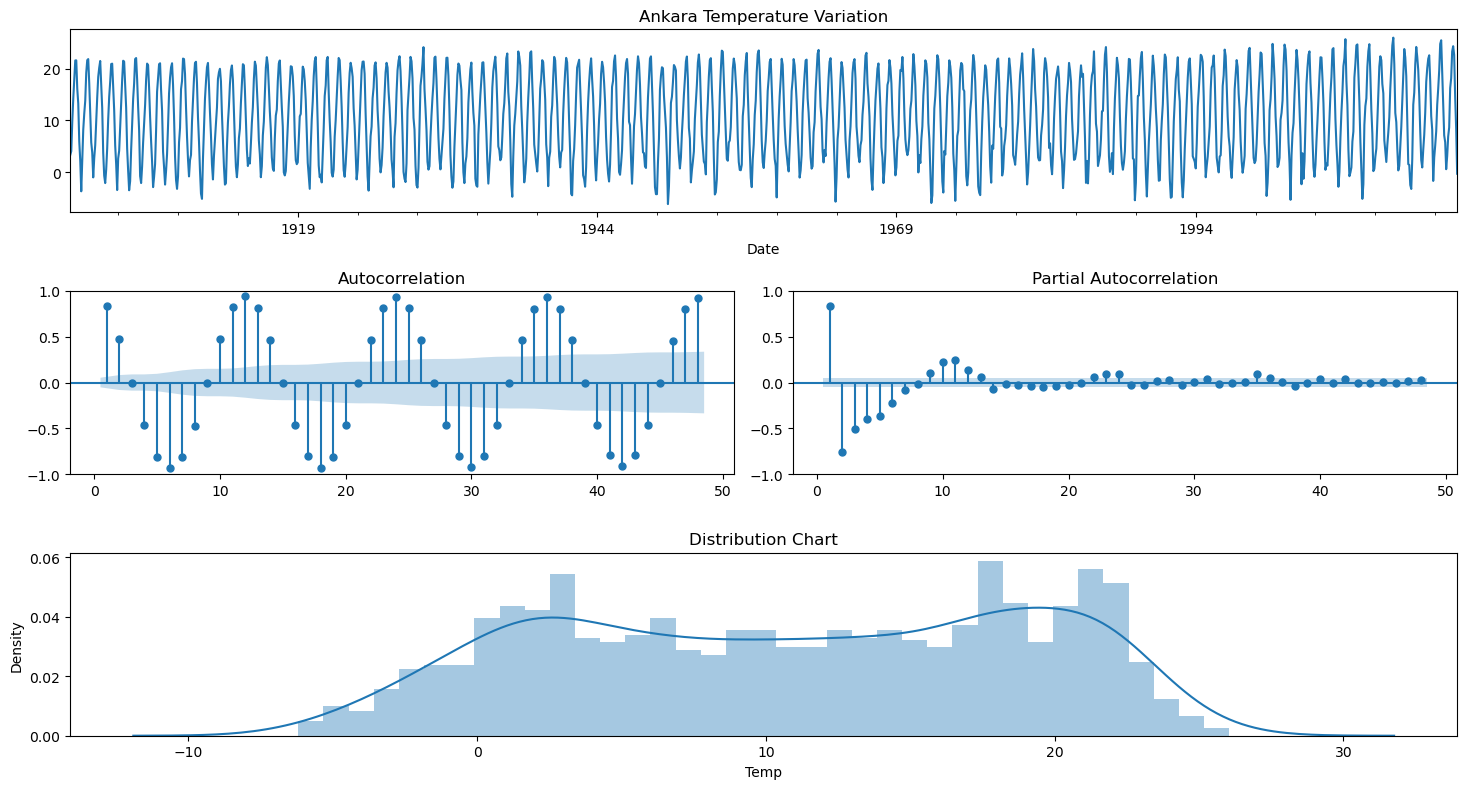

In [46]:
# The first approach is to check the series without any transformation
check_stationarity(train['Temp'])

In [47]:
# Here are the key elements of the Dickey-Fuller test results:

# Test Statistic (-5.0948):

# The test statistic is a measure of how much the time series needs to be differenced to become stationary. In this case, the test statistic is -5.0948.
# p-value (0.0000):

# The p-value is used to determine the significance of the test statistic. A low p-value (typically less than 0.05) suggests that you can reject the null hypothesis, indicating the presence of a unit root. In this case, the p-value is 0.0000, which is very low, so you can reject the null hypothesis.
# Lags Used (23.0000):

# The number of lags used in the regression when performing the test. In this case, 23 lags were used.
# Number of Observations Used (1367.0000):

# The number of observations used in the test. This is the length of your time series data.
# Critical Values:

# Critical values are thresholds that help in deciding whether to reject the null hypothesis. They are provided at different significance levels (1%, 5%, and 10%).
# If the test statistic is more extreme than the critical value at a certain significance level, you can reject 
# the null hypothesis.
# In this case, the critical values are as follows:
# Critical Value (1%): -3.4351
# Critical Value (5%): -2.8637
# Critical Value (10%): -2.5679
# Interpretation:

# The test statistic (-5.0948) is more extreme than the critical values at all significance levels (1%, 5%, and 10%).
# The p-value is very low (0.0000), indicating strong evidence against the null hypothesis.
# Therefore, you can reject the null hypothesis of a unit root, suggesting that the time series is likely stationary.
# In summary, based on the results, it appears that differencing the time series can make it stationary, 
# which is often a prerequisite for time series analysis and modeling.

Results of Dickey-Fuller Test:
Test Statistic                  -12.3215
p-value                           0.0000
Lags Used                        24.0000
Number of Observations Used    1354.0000
Critical Value (1%)              -3.4352
Critical Value (5%)              -2.8637
Critical Value (10%)             -2.5679
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


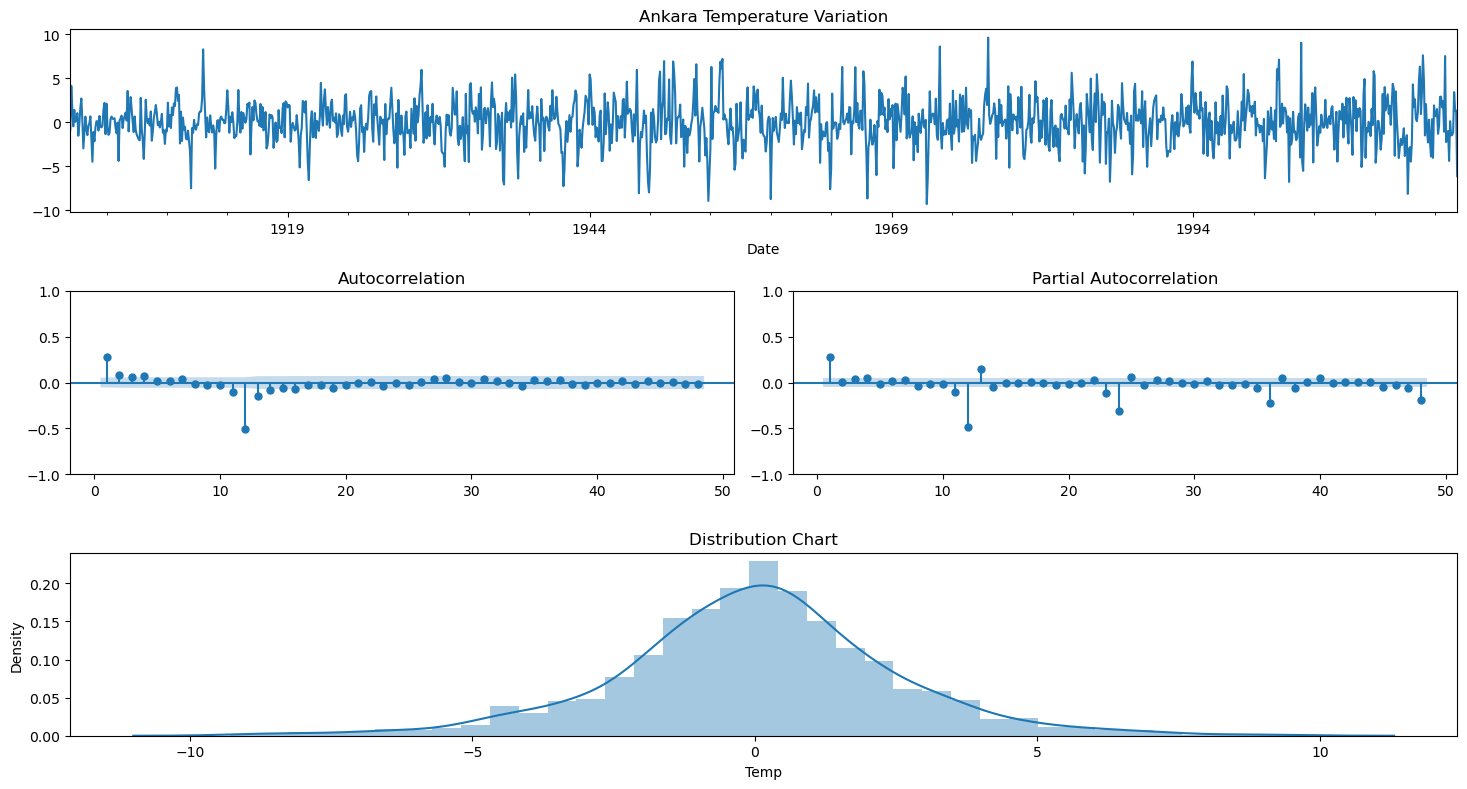

In [48]:
check_stationarity(train['Temp'].diff(12).dropna())

In [49]:
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

In [54]:
# Let's test it in the validation set
val['Pred'] = walk_forward(train['Temp'], val['Temp'], ((1,1,2),(2,1,2,12),'ct'))

In [55]:
# Measuring the error of the prediction
rmse_pred = measure_rmse(val['Temp'], val['Pred'])

print(f"The RMSE of the SARIMA(1,1,2),(2,1,2,12),'ct' model is {round(rmse_pred,4)} celsius degrees")
print(f"It's a decrease of {round((rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMA(1,1,2),(2,1,2,12),'ct' model is 1.4887 celsius degrees
It's a decrease of -67.66% in the RMSE


In [56]:
# Creating the error column
val['Error'] = val['Temp'] - val['Pred']

In [57]:
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values', fontsize = 14)
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values', fontsize = 14)
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [58]:
# We need to remove some columns to plot the charts
val.drop(['month','year'], axis=1, inplace=True)
val.head()

Temp       Pred     Error
Date                                   
2015-12-31  -0.099  -0.596696  0.497696
2016-01-31   6.780   2.655076  4.124924
2016-02-29   7.737   8.239351 -0.502351
2016-03-31  13.826  12.142264  1.683736
2016-04-30  15.246  17.947308 -2.701308

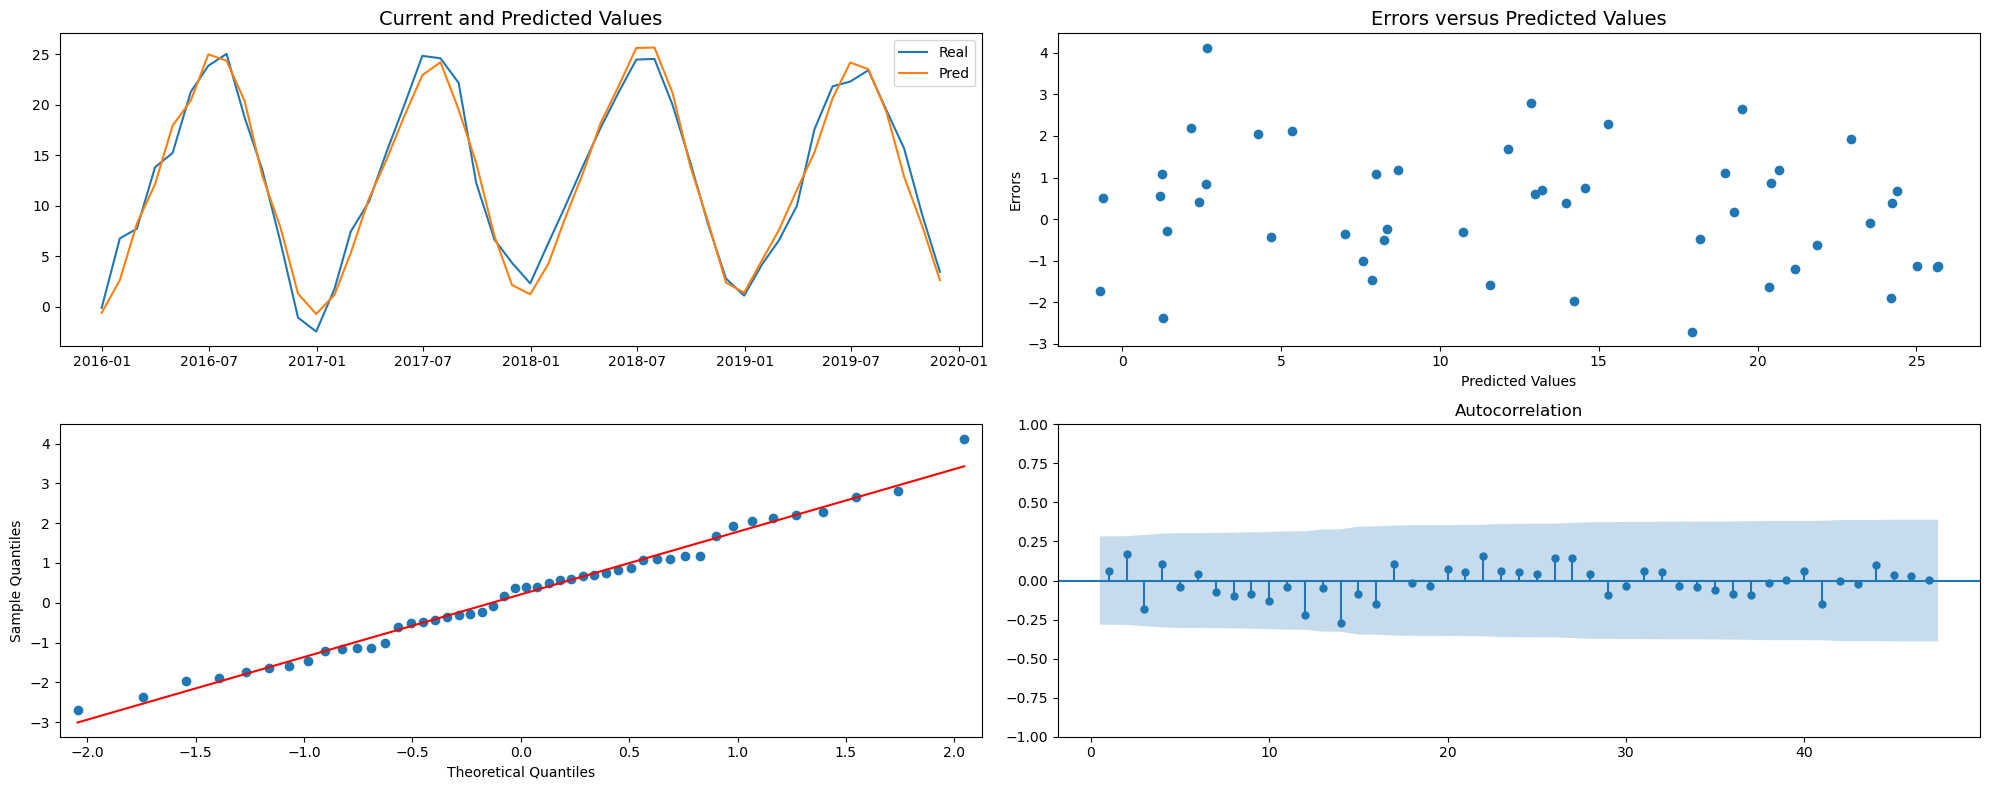

In [59]:
plot_error(val)

In [60]:
#Creating the new concatenating the training and validation set:
future = pd.concat([train['Temp'], val['Temp']])
future.head()

Date
1900-01-31     3.339
1900-02-28     4.060
1900-03-31     9.777
1900-04-30    14.301
1900-05-31    17.860
Freq: M, Name: Temp, dtype: float64

In [61]:
# Using the same parameters of the fitted model
model = sm.tsa.statespace.SARIMAX(future, order=(1,1,2), seasonal_order=(2,1,2,12), trend='ct')
result = model.fit(disp=False)

In [62]:
# Now I'm going to create a new column on the test set with the predicted 
# values and I will compare them against the real values '''

In [63]:
test['Pred'] = result.predict(start=(len(future)), end=(len(future)+13))

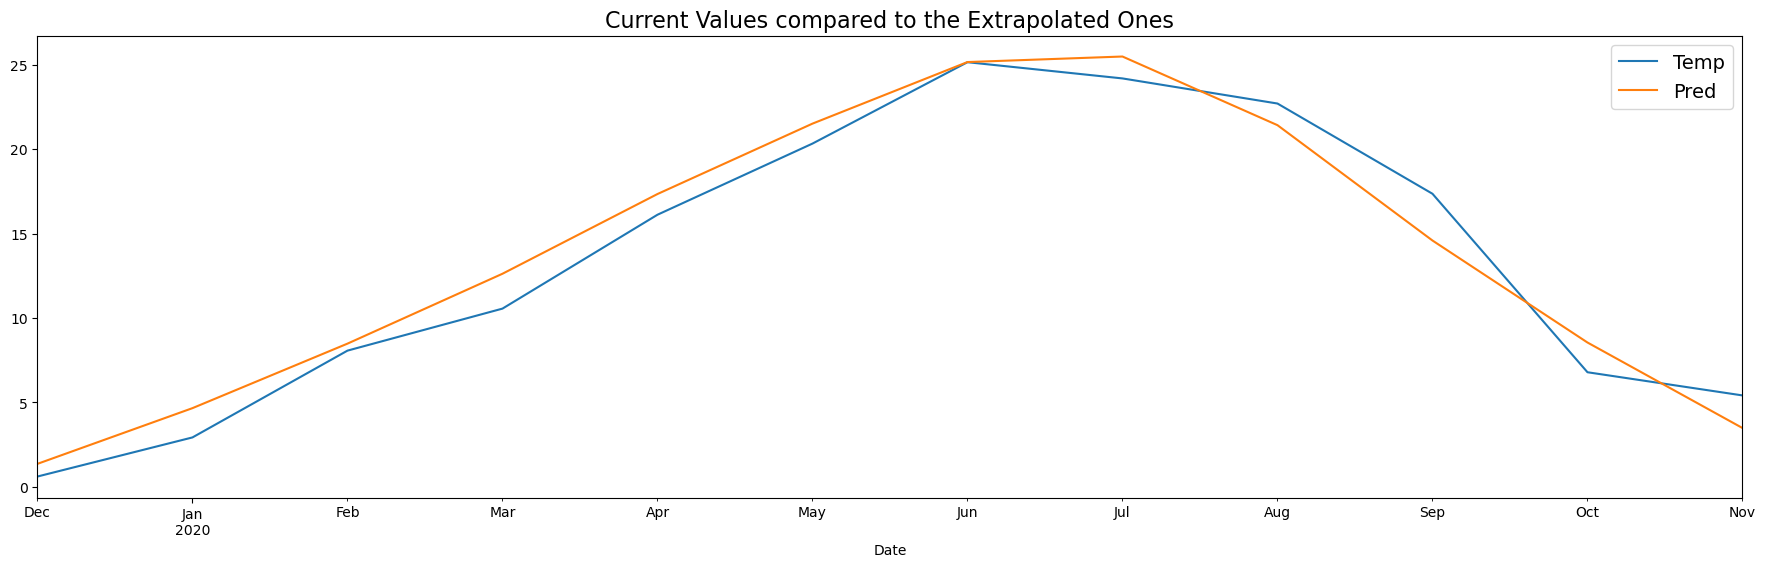

In [64]:
# Test set with predicted values vs. real values
test[['Temp', 'Pred']].plot(figsize=(22,6))
plt.legend(fontsize='14')
plt.title('Current Values compared to the Extrapolated Ones',  fontsize='16')
plt.show()

In [65]:
# Calculation of RMSE

test_baseline = test['Temp'].shift()

test_baseline[0] = test['Temp'][0]

rmse_test_base = measure_rmse(test['Temp'],test_baseline)
rmse_test_extrap = measure_rmse(test['Temp'], test['Pred'])

print(f'The baseline RMSE for the test baseline was {round(rmse_test_base,2)} celsius degrees')
print(f'The baseline RMSE for the test extrapolation was {round(rmse_test_extrap,2)} celsius degrees')
print(f'That is an improvement of {-round((rmse_test_extrap/rmse_test_base-1)*100,2)}%')

The baseline RMSE for the test baseline was 4.61 celsius degrees
The baseline RMSE for the test extrapolation was 1.55 celsius degrees
That is an improvement of 66.45%


In [66]:
print(test)

              Temp  month  year       Pred
Date                                      
2019-12-31   0.606     12  2019   1.357487
2020-01-31   2.922      1  2020   4.656290
2020-02-29   8.063      2  2020   8.477330
2020-03-31  10.552      3  2020  12.617443
2020-04-30  16.113      4  2020  17.339491
2020-05-31  20.327      5  2020  21.509296
2020-06-30  25.148      6  2020  25.156807
2020-07-31  24.187      7  2020  25.484348
2020-08-31  22.700      8  2020  21.418079
2020-09-30  17.355      9  2020  14.585668
2020-10-31   6.783     10  2020   8.544031
2020-11-30   5.410     11  2020   3.479051


In [ ]:
# Calculation of Absolute Error in Kelvin for test

In [71]:
# Convert Celsius temperatures to Kelvin
test['Temp_Kelvin'] = test['Temp'] + 273.15

# Convert Celsius predictions to Kelvin
test['Pred_Kelvin'] = test['Pred'] + 273.15

# Calculate absolute error between temperature and prediction in Kelvin
test['absolute_err_Kelvin'] = abs(test['Temp_Kelvin'] - test['Pred_Kelvin'])

# Calculate absolute error in % in Kelvin
test['absolute_err_Kelvin_perc'] = (abs(test['Pred_Kelvin'] - test['Temp_Kelvin']) / test['Temp_Kelvin'])*100

print(test)

              Temp  month  year       Pred  Temp_Kelvin  Pred_Kelvin  \
Date                                                                   
2019-12-31   0.606     12  2019   1.357487      273.756   274.507487   
2020-01-31   2.922      1  2020   4.656290      276.072   277.806290   
2020-02-29   8.063      2  2020   8.477330      281.213   281.627330   
2020-03-31  10.552      3  2020  12.617443      283.702   285.767443   
2020-04-30  16.113      4  2020  17.339491      289.263   290.489491   
2020-05-31  20.327      5  2020  21.509296      293.477   294.659296   
2020-06-30  25.148      6  2020  25.156807      298.298   298.306807   
2020-07-31  24.187      7  2020  25.484348      297.337   298.634348   
2020-08-31  22.700      8  2020  21.418079      295.850   294.568079   
2020-09-30  17.355      9  2020  14.585668      290.505   287.735668   
2020-10-31   6.783     10  2020   8.544031      279.933   281.694031   
2020-11-30   5.410     11  2020   3.479051      278.560   276.62